**CS-GY 6613, Artificial Intelligence, Spring 2020**<br/>
**New York University Tandon School of Engineering**<br/>
**Course Project: Going back to work**<br/>
**Name - Durga Prasad Reddy Kasireddy**<br/> 
**Net ID - dpk290**<br/>
**Name - Haneen Alsuradi**<br/> 
**Net ID - hha243**<br/>
**Name - Teena Kunsoth**<br/> 
**Net ID - tk2598**<br/>

# Project 4 (Going Back to Work)

# 1) Project Description:

In the first quarter of 2020, the whole world suffered from a severe pandemic that resulted in thousands of deaths, overloading of hospitals and health facilities and spike in the um-employement rate. In this project, the aim is to develop an AI powered system that helps people to go back to work while protecting them from infection through social distancing (reducing people's density at locations across NYC).

* The system accepts requests from people residing in NYC to visit a specific area in NYC and sends back a resoonse with "approved" or "rejected".

* This kind of system will work well given datasets of people's location (through cellular network). However, due to privacy consideration, this kind of data is not available.

* Instead, we will use the dataset of NYC taxi rides as an indication for people's locations across NYC. 

* Mainly, we are interested in the drop-off locations. Data is fetched from <a href="https://opendata.cityofnewyork.us/">NYC Open data</a>. (Download the dataset from https://www.kaggle.com/teenakunsoth/nyctaxi )

* As a demonstration for the capability of the system, we will limit the analysis for 3 specific areas in Manhattan. This analysis can be extended to cover the whole area of NYC as well.

* We need to understand the demand on the chosen location before COVID-19 and decide on a policy to flatten the demand curve. For example, we can say only half of the pre-COVID19 demand is allowed. Thus, we need to understand the demand before COVID-19.

* The decision of the AI powered system will depend on how many people will be in the building at the time of drop off and on what is the allowed capacity for the building.



# 2) Steps for data pre-processing:

* First, we choose 3 locations in NYC, below are their IDs:
    1. Location 1: ID = 79
    2. Location 2: ID = 100
    3. Location 3: ID= 143
* We used data from three types of ride-company servies:
    1. Yellows Taxis
    2. Green Taxis
    3. For Hired Vehicles (FHV)
* We used data from the years (2017,2018,2019)

* Drop off locations are available in terms of location ID at <a href="https://opendata.cityofnewyork.us/">NYC Open data</a>. 

* The data we have is taxi trips data which includes drop off timings and locations. 

* Then, we will implement the pre-processing steps on the data to better understand the demand model for the selected areas. The data we have consist of the (date, drop off time, location). We should filter the data by location to get only the relevant drop offs for the selected building.

* Demand models shall be generated for each of the locations. 
    1. For each location, data is split into training and testing.
    2. We create a histogram (x-axis: hour of the day, y-axis: counts) for both the training and testing data
    3. We fit the normalized histograms to a probablity distribution function.
    4. We expect that the two fits (training and testing) should yield the same distribution.
    5. We confirm our expectation using Kullback–Leibler divergence method.
* Now we have a PDF that describes drop-offs for the 3 selected locations.
<img src="../input/images/IDNYC.jpg">



Since we are not using computer vision tools and neither have real time video surveillance data, we generate data based on the model and assume that a user arrives at his destination at the time he booked the slot.

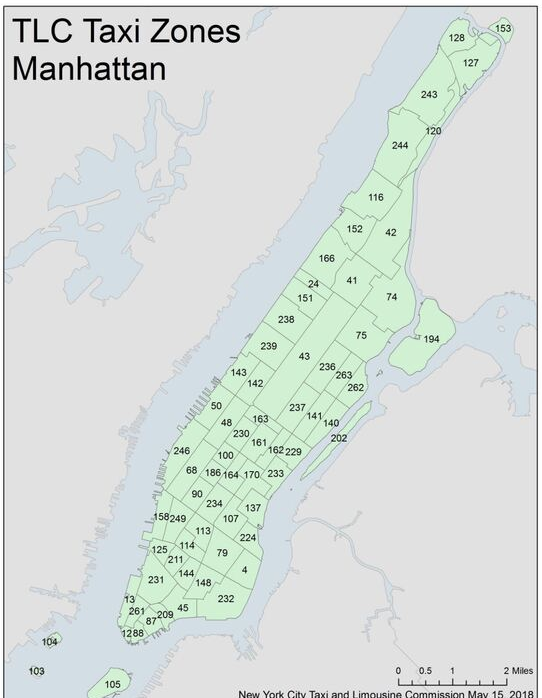

Although there are many means of transportation to the locations (private cars, by walk or bike, subway etc). We only process the data from taxi dropoffs Open NYC data. If we have data of number of people at a particular location before COVID19 crisis, we can restrict people choosing any transportation to maintain social distancing by making slight changes to our current version of the project. 

# 3) Steps for the scheduling algorithm:

* Let’s say the threshold for the number of occupants in the building at any point is h. We can set h to be any fraction (say half) of the number of occupants at the peak hour of the day.
* We need to simulate a system where people are dynamically making slot requests to our system and in turn receive an approval or reject.
* We need to demonstrate the traffic handling for one day. That is we demonstrate how requests are made and handled throughout a given day. For this we use our model to predict the number of requests (y) made at a given time t. Then we need to handle the y requests made simultaneously at time t. 
* When a request is made (arrival time: t_a, time slot: b hours), we check the number of occupants in the building. If adding this new occupant exceeds the threshold h at any point of time between the time slot [t_a, t_a+b], then we reject the request. This is the simplified version.
* If the request is valid we approve the request and increment the number of occupants between hours [t_a, t_a+b] in the building by 1.(For this we can create an array of size 24 for the number of hours in a day and update the number of occupants at each hour)
* For the purpose of simplicity we require the requested time slot and the arrival hour to be an integer. We also require that the time slot a person requests cannot exceed x number of hours.
* The Algorithm is explained in detail later

# 4) Implementation of pre_processing and modelling:


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyctaxi/ID79_2019_For_Hire_Vehicles_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2019_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID100_2018_For_Hire_Vehicles_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2019_For_Hire_Vehicles_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2018_For_Hire_Vehicles_Trip_Data.csv
/kaggle/input/nyctaxi/ID79_2017_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID79_2018_For_Hire_Vehicles_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2017_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2017_For_Hire_Vehicle_Trip_Data.csv
/kaggle/input/nyctaxi/ID100_2018_Yellow_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID79_2018_Yellow_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID79_2018_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2018_Yellow_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID100_2017_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID100_2019_Yellow_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID143_2018_Green_Taxi_Trip_Data.csv
/kaggle/input/nyctaxi/ID79_2019_

**We first fetch data for location 79. We compile the data from its 3 sources (yellow taxi, green taxi and FHV). We drop all un-necessary columns and keep the date of the trip and the drop off location. We make sure to transfrom the date column into a 'datetime' object in order to be able to facilitate dealing with the date and time information as it will be clear in later steps. We fill the clean data into a new dataframe called "bigdf"**

In [2]:
from glob import glob
filenames = glob('/kaggle/input/nyctaxi/ID79*_Yellow*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
print(filenames)

bigdf = pd.DataFrame()
for df in dataframes:
    df=df[['tpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='yellow'
    df=df.rename(columns = {'tpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
filenames = glob('/kaggle/input/nyctaxi/ID79*_Green*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['lpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='green'
    df=df.rename(columns = {'lpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
    
filenames = glob('/kaggle/input/nyctaxi/ID79*_Hire*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
for df in dataframes:
    df=df[['DropOff_datetime', 'DOLocationID']]
    df['taxitype']='hire'
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%y %H:%M')
    bigdf=bigdf.append(df)
print('Dataframe shape for location 79:', bigdf.shape)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


['/kaggle/input/nyctaxi/ID79_2018_Yellow_Taxi_Trip_Data.csv', '/kaggle/input/nyctaxi/ID79_2019_Yellow_Taxi_Trip_Data.csv', '/kaggle/input/nyctaxi/ID79_2017_Yellow_Taxi_Trip_Data.csv']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Dataframe shape for location 79: (9679041, 3)


**The same processing step is done on location 100 and location 143**

In [3]:
#location 100
filenames = glob('/kaggle/input/nyctaxi/ID100*_Yellow*.csv')
print(filenames)
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['tpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='yellow'
    df=df.rename(columns = {'tpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
    
filenames = glob('/kaggle/input/nyctaxi/ID100*_Green*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['lpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='green'
    df=df.rename(columns = {'lpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
    
filenames = glob('/kaggle/input/nyctaxi/ID100*_Hire*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['DropOff_datetime', 'DOLocationID']]
    df['taxitype']='hire'
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%y %H:%M')
    bigdf=bigdf.append(df)
print('Dataframe shape for location 100:', bigdf.shape)

#location 143
filenames = glob('/kaggle/input/nyctaxi/ID143*_Yellow*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['tpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='yellow'
    df=df.rename(columns = {'tpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
    
filenames = glob('/kaggle/input/nyctaxi/ID143*_Green*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['lpep_dropoff_datetime', 'DOLocationID']]
    df['taxitype']='green'
    df=df.rename(columns = {'lpep_dropoff_datetime':'DropOff_datetime'})
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    bigdf=bigdf.append(df)
    
filenames = glob('/kaggle/input/nyctaxi/ID143*_Hire*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

for df in dataframes:
    df=df[['DropOff_datetime', 'DOLocationID']]
    df['taxitype']='hire'
    df['DropOff_datetime']=pd.to_datetime(df['DropOff_datetime'], format='%m/%d/%y %H:%M')
    bigdf=bigdf.append(df)
print('Dataframe shape for location 143:', bigdf.shape)

['/kaggle/input/nyctaxi/ID100_2018_Yellow_Taxi_Trip_Data.csv', '/kaggle/input/nyctaxi/ID100_2019_Yellow_Taxi_Trip_Data.csv', '/kaggle/input/nyctaxi/ID100_2017_Yellow_Taxi_Trip_Data.csv']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Dataframe shape for location 100: (16520869, 3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Dataframe shape for location 143: (22284157, 3)


Now we display the dataframe which we have been filling the clean data into it "bigdf"

In [4]:
bigdf.head(4)

,DropOff_datetime,DOLocationID,taxitype
0,2018-06-01 10:32:59,79,yellow
1,2018-06-01 10:55:34,79,yellow
2,2018-06-01 10:55:20,79,yellow
3,2018-06-01 10:53:48,79,yellow


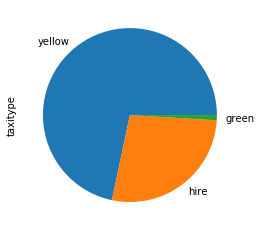

In [5]:
df = bigdf['taxitype'].value_counts()
ax = df.plot(x='Taxi Type', y='val', rot=0,kind='pie')

In order to create demand models for each of the locations, we have to extract the the data realted to each location separately. 

In [6]:
df79=bigdf[(bigdf.DOLocationID == 79)]
df100=bigdf[(bigdf.DOLocationID == 100)]
df143=bigdf[(bigdf.DOLocationID == 143)]


Then, we plot the histograms of the demand on an hourly basis per day. We plot both total count across 3 years and the averge count of the rides

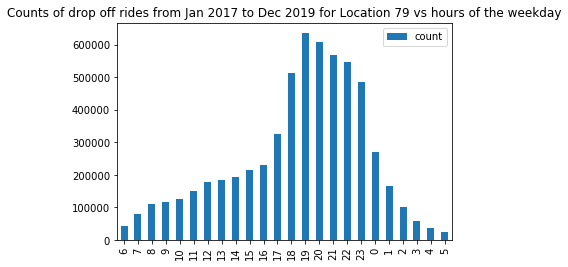

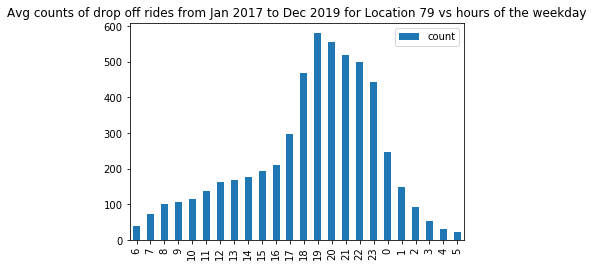

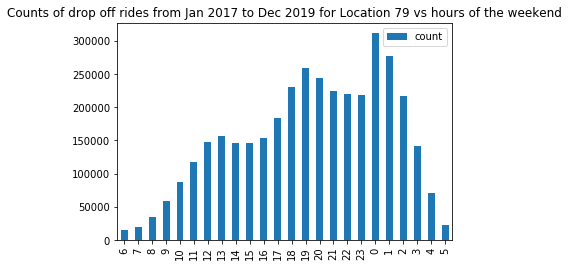

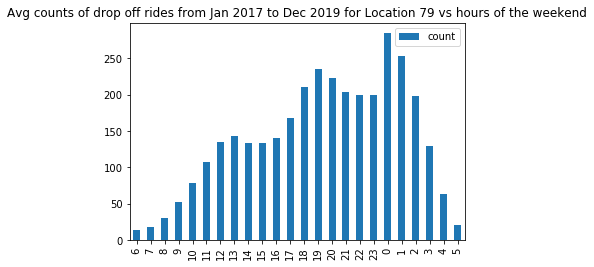

In [7]:
df79_sat=df79[(df79['DropOff_datetime'].dt.day_name() == 'Saturday')]['DropOff_datetime'].dt.hour.value_counts()
df79_sun=df79[(df79['DropOff_datetime'].dt.day_name() == 'Sunday')]['DropOff_datetime'].dt.hour.value_counts()
df79_mon=df79[(df79['DropOff_datetime'].dt.day_name() == 'Monday')]['DropOff_datetime'].dt.hour.value_counts()
df79_tues=df79[(df79['DropOff_datetime'].dt.day_name() == 'Tuesday')]['DropOff_datetime'].dt.hour.value_counts()
df79_wed=df79[(df79['DropOff_datetime'].dt.day_name() == 'Wednesday')]['DropOff_datetime'].dt.hour.value_counts()
df79_thu=df79[(df79['DropOff_datetime'].dt.day_name() == 'Thursday')]['DropOff_datetime'].dt.hour.value_counts()
df79_fri=df79[(df79['DropOff_datetime'].dt.day_name() == 'Friday')]['DropOff_datetime'].dt.hour.value_counts()

df79_weekday = df79_mon+df79_tues+df79_wed+df79_thu+df79_fri
df2=pd.DataFrame()
df2['count']= df79_weekday
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of the weekday')


df79_weekday_avg=np.round(df79_weekday/(365*3))
df2['count']= df79_weekday_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of the weekday')


df79_weekend = df79_sat+df79_sun
df2=pd.DataFrame()
df2['count']= df79_weekend
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of the weekend')


df79_weekend_avg=np.round(df79_weekend/(365*3))
df2['count']= df79_weekend_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of the weekend')


**Pre processing, Policy Exaplained:**

For location 79, 
Looking at the plots (count vs hour) for each day of the week, the demand on all the weekdays is almost same. Hence, we combine all the weekdays and plot one model.

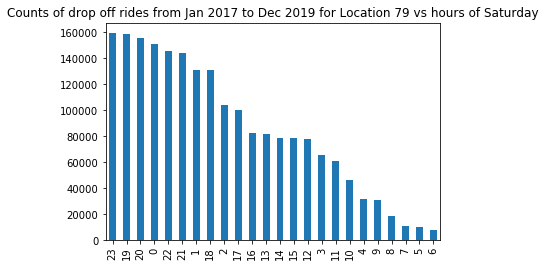

In [8]:
df79_sat=df79[(df79['DropOff_datetime'].dt.day_name() == 'Saturday')]['DropOff_datetime'].dt.hour.value_counts()
ax = df79_sat.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of Saturday')

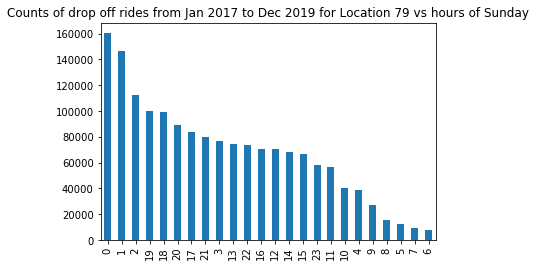

In [9]:
df79_sun=df79[(df79['DropOff_datetime'].dt.day_name() == 'Sunday')]['DropOff_datetime'].dt.hour.value_counts()
ax = df79_sun.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 79 vs hours of Sunday')

Although the demand model for Saturday and Sunday differ a lot, we build a single model for both these days under ‘weekend’. The reason behind this is, there are some peak times during weekends that the population density is too high and some hours where it is too low. Assuming most of the people choose to go out at those particular hours of the day is to relax or other fun activities (most people don’t work on weekend so they go out for other stuff). We plan to distribute this dense population between all the hours of the day so that most of the people are satisfied. As Policy makers, we have to design mechanism such that it is in the best interest of each individual to go out at different time of the day.


Same goes for location 100, 143

Similarly, we generate the same histogram for location 100:

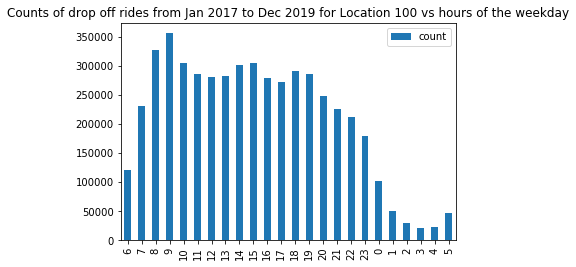

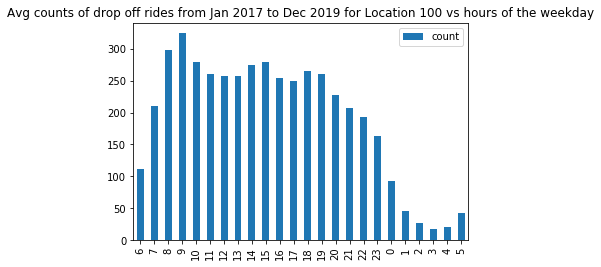

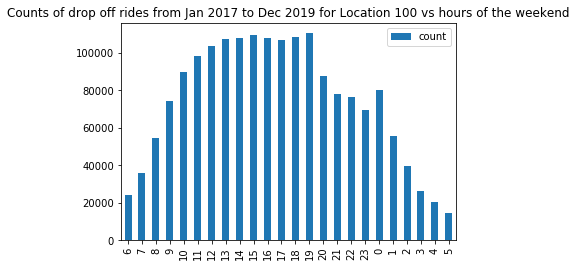

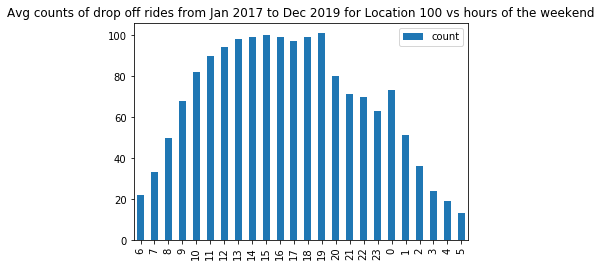

In [10]:
df100_sat=df100[(df100['DropOff_datetime'].dt.day_name() == 'Saturday')]['DropOff_datetime'].dt.hour.value_counts()
df100_sun=df100[(df100['DropOff_datetime'].dt.day_name() == 'Sunday')]['DropOff_datetime'].dt.hour.value_counts()
df100_mon=df100[(df100['DropOff_datetime'].dt.day_name() == 'Monday')]['DropOff_datetime'].dt.hour.value_counts()
df100_tues=df100[(df100['DropOff_datetime'].dt.day_name() == 'Tuesday')]['DropOff_datetime'].dt.hour.value_counts()
df100_wed=df100[(df100['DropOff_datetime'].dt.day_name() == 'Wednesday')]['DropOff_datetime'].dt.hour.value_counts()
df100_thu=df100[(df100['DropOff_datetime'].dt.day_name() == 'Thursday')]['DropOff_datetime'].dt.hour.value_counts()
df100_fri=df100[(df100['DropOff_datetime'].dt.day_name() == 'Friday')]['DropOff_datetime'].dt.hour.value_counts()

df100_weekday = df100_mon+df100_tues+df100_wed+df100_thu+df100_fri
df2=pd.DataFrame()
df2['count']= df100_weekday
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 100 vs hours of the weekday')


df100_weekday_avg=np.round(df100_weekday/(365*3))
df2['count']= df100_weekday_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 100 vs hours of the weekday')


df100_weekend = df100_sat+df100_sun
df2=pd.DataFrame()
df2['count']= df100_weekend
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 100 vs hours of the weekend')


df100_weekend_avg=np.round(df100_weekend/(365*3))
df2['count']= df100_weekend_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 100 vs hours of the weekend')

Similarly, we generate the same histograms for location 143:

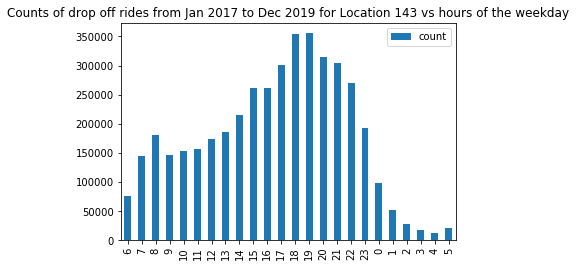

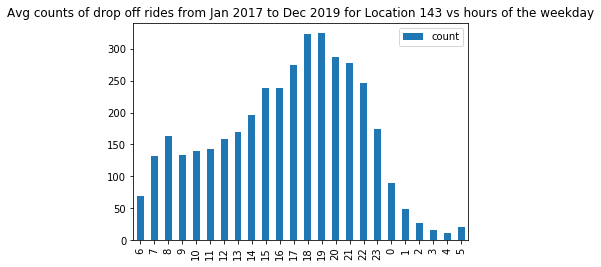

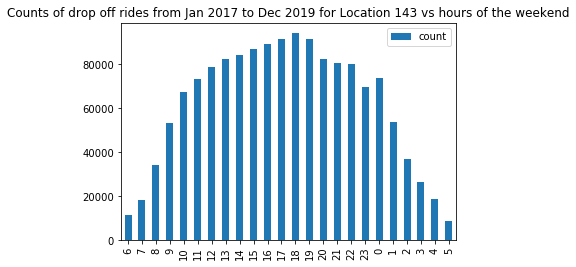

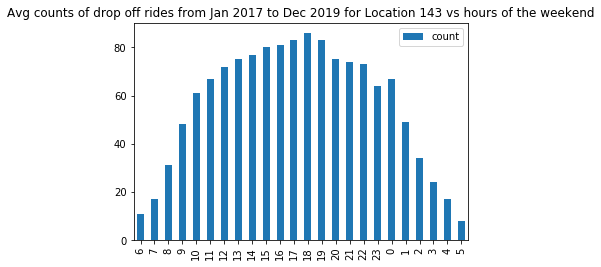

In [11]:
df143_sat=df143[(df143['DropOff_datetime'].dt.day_name() == 'Saturday')]['DropOff_datetime'].dt.hour.value_counts()
df143_sun=df143[(df143['DropOff_datetime'].dt.day_name() == 'Sunday')]['DropOff_datetime'].dt.hour.value_counts()
df143_mon=df143[(df143['DropOff_datetime'].dt.day_name() == 'Monday')]['DropOff_datetime'].dt.hour.value_counts()
df143_tues=df143[(df143['DropOff_datetime'].dt.day_name() == 'Tuesday')]['DropOff_datetime'].dt.hour.value_counts()
df143_wed=df143[(df143['DropOff_datetime'].dt.day_name() == 'Wednesday')]['DropOff_datetime'].dt.hour.value_counts()
df143_thu=df143[(df143['DropOff_datetime'].dt.day_name() == 'Thursday')]['DropOff_datetime'].dt.hour.value_counts()
df143_fri=df143[(df143['DropOff_datetime'].dt.day_name() == 'Friday')]['DropOff_datetime'].dt.hour.value_counts()

df143_weekday = df143_mon+df143_tues+df143_wed+df143_thu+df143_fri
df2=pd.DataFrame()
df2['count']= df143_weekday
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 143 vs hours of the weekday')


df143_weekday_avg=np.round(df143_weekday/(365*3))
df2['count']= df143_weekday_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 143 vs hours of the weekday')


df143_weekend = df143_sat+df143_sun
df2=pd.DataFrame()
df2['count']= df143_weekend
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
ax = df2.plot.bar(title='Counts of drop off rides from Jan 2017 to Dec 2019 for Location 143 vs hours of the weekend')


df143_weekend_avg=np.round(df143_weekend/(365*3))
df2['count']= df143_weekend_avg
ax = df2.plot.bar(title='Avg counts of drop off rides from Jan 2017 to Dec 2019 for Location 143 vs hours of the weekend')

Now, we split the data into train and test before fitting the data into a PDF model.

In [12]:
from sklearn.model_selection import train_test_split

df79_weekday_t=pd.DataFrame()
df79_weekday_t=df79[(df79['DropOff_datetime'].dt.day_name() == ('Monday'))]
df79_weekday_t=df79_weekday_t.append(df79[(df79['DropOff_datetime'].dt.day_name() == ('Tuesday'))])
df79_weekday_t=df79_weekday_t.append(df79[(df79['DropOff_datetime'].dt.day_name() == ('Wednesday'))])
df79_weekday_t=df79_weekday_t.append(df79[(df79['DropOff_datetime'].dt.day_name() == ('Thursday'))])
df79_weekday_t=df79_weekday_t.append(df79[(df79['DropOff_datetime'].dt.day_name() == ('Friday'))])

df79_weekend_t=pd.DataFrame()
df79_end_t=df79[(df79['DropOff_datetime'].dt.day_name() == ('Saturday'))]
df79_weekend_t=df79_weekend_t.append(df79[(df79['DropOff_datetime'].dt.day_name() == ('Sunday'))])


df100_weekday_t=pd.DataFrame()
df100_weekday_t=df100[(df100['DropOff_datetime'].dt.day_name() == ('Monday'))]
df100_weekday_t=df100_weekday_t.append(df100[(df100['DropOff_datetime'].dt.day_name() == ('Tuesday'))])
df100_weekday_t=df100_weekday_t.append(df100[(df100['DropOff_datetime'].dt.day_name() == ('Wednesday'))])
df100_weekday_t=df100_weekday_t.append(df100[(df100['DropOff_datetime'].dt.day_name() == ('Thursday'))])
df100_weekday_t=df100_weekday_t.append(df100[(df100['DropOff_datetime'].dt.day_name() == ('Friday'))])

df100_weekend_t=pd.DataFrame()
df100_end_t=df100[(df100['DropOff_datetime'].dt.day_name() == ('Saturday'))]
df100_weekend_t=df100_weekend_t.append(df100[(df100['DropOff_datetime'].dt.day_name() == ('Sunday'))])

df143_weekday_t=pd.DataFrame()
df143_weekday_t=df143[(df143['DropOff_datetime'].dt.day_name() == ('Monday'))]
df143_weekday_t=df143_weekday_t.append(df143[(df143['DropOff_datetime'].dt.day_name() == ('Tuesday'))])
df143_weekday_t=df143_weekday_t.append(df143[(df143['DropOff_datetime'].dt.day_name() == ('Wednesday'))])
df143_weekday_t=df143_weekday_t.append(df143[(df143['DropOff_datetime'].dt.day_name() == ('Thursday'))])
df143_weekday_t=df143_weekday_t.append(df143[(df143['DropOff_datetime'].dt.day_name() == ('Friday'))])

df143_weekend_t=pd.DataFrame()
df143_end_t=df143[(df143['DropOff_datetime'].dt.day_name() == ('Saturday'))]
df143_weekend_t=df143_weekend_t.append(df143[(df143['DropOff_datetime'].dt.day_name() == ('Sunday'))])



#weekday
train_79_weekday, test_79_weekday = train_test_split(df79_weekday_t, test_size=0.2)
print('Train size for location 79 on weekdays: ', train_79_weekday.size)
print('Test size for location 79 on weekdays: ', test_79_weekday.size)

train_100_weekday, test_100_weekday = train_test_split(df100_weekday_t, test_size=0.2)
print('Train size for location 100 on weekdays: ', train_100_weekday.size)
print('Test size for location 100 on weekdays: ', test_100_weekday.size)


train_143_weekday, test_143_weekday = train_test_split(df143_weekday_t, test_size=0.2)
print('Train size for location 143 on weekdays: ', train_143_weekday.size)
print('Test size for location 14 on weekdays: ', test_143_weekday.size)

#weekend
train_79_weekend, test_79_weekend = train_test_split(df79_weekend_t, test_size=0.2)
print('Train size for location 79 on weekends: ', train_79_weekend.size)
print('Test size for location 79 on weekends: ', test_79_weekend.size)

train_100_weekend, test_100_weekend = train_test_split(df100_weekend_t, test_size=0.2)
print('Train size for location 100 on weekends: ', train_100_weekend.size)
print('Test size for location 100 on weekends: ', test_100_weekend.size)


train_143_weekend, test_143_weekend = train_test_split(df143_weekend_t, test_size=0.2)
print('Train size for location 143 on weekends: ', train_143_weekend.size)
print('Test size for location 143 on weekends: ', test_143_weekend.size)



Train size for location 79 on weekdays:  14344740
Test size for location 79 on weekdays:  3586188
Train size for location 100 on weekdays:  12136122
Test size for location 100 on weekdays:  3034032
Train size for location 143 on weekdays:  10261839
Test size for location 14 on weekdays:  2565462
Train size for location 79 on weekends:  3929565
Test size for location 79 on weekends:  982392
Train size for location 100 on weekends:  1928316
Test size for location 100 on weekends:  482079
Train size for location 143 on weekends:  1693239
Test size for location 143 on weekends:  423312


* We generate the PDF for location 79. We make sure that the PDF satifies the condition on PDF distributions which is: the area under the curve should be one.
* We tried couple of PDFs (such as poisson and gaussian). However, it seems from the histograms above that the data is bimodal. Thus, we decided to use a bimodal distribution to fit it on the training and testing data.

* To asses the suitability of the model, we compare the training PDF and the testing PDF using the Kullback–Leibler (KL) divergence test.  The Kullback–Leibler divergence is a measure of how one probability distribution is different from a second, reference probability distribution. The lower the value, the closer the PDFs to each other.

$$KL = \sum P(x) log(\frac{P(X)}{Q(X)})$$


Text(0.5, 0, 'Hour')

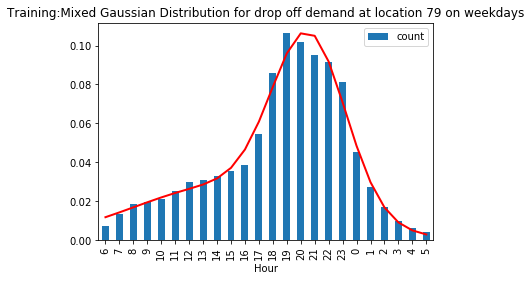

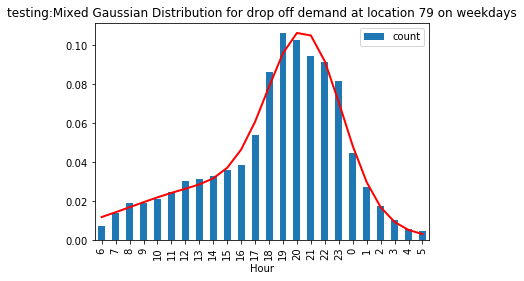

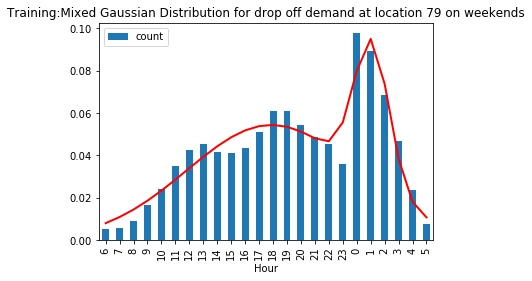

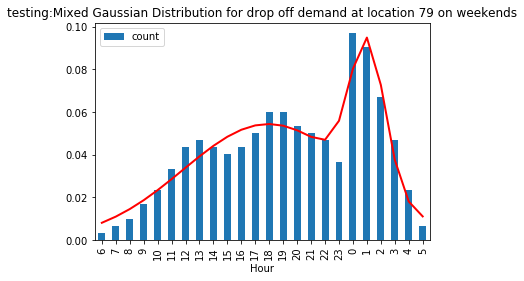

In [13]:
import scipy
from scipy.optimize import curve_fit    
import matplotlib.pyplot as plt

def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

#weekday train
train = train_79_weekday['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(11,.2,300,20,.2,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_79_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_79_weekday, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 79 on weekdays')
plt.xlabel('Hour')

#weekday test

test = test_79_weekday['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(11,.2,300,20,.2,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_79_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_79_weekday, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 79 on weekdays')
plt.xlabel('Hour')



#weekend train
train = train_79_weekend['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values


expected=(0,.4,300,18,.6,300)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_79_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_79_weekend, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 79 on weekends')
plt.xlabel('Hour')

#weekend test
test = test_79_weekend['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(20,.4,900,19,.6,300)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_79_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_79_weekend, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 79 on weekends')
plt.xlabel('Hour')

Then we use KL divergeance to compare training and testing PDFs:

KL divergence =  1.4366527182158853e-05
KL divergence =  2.987282610595601e-05


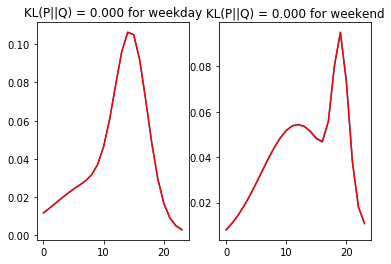

In [14]:
import matplotlib.pyplot as plt
KL=np.sum(train_pdf_79_weekday*np.log(train_pdf_79_weekday/test_pdf_79_weekday))
print('KL divergence = ', KL)
plt.subplot(1, 2, 1, autoscale_on=1)
plt.title('KL(P||Q) = %1.3f for weekday' % KL)
plt.plot(x_plot, train_pdf_79_weekday)
plt.plot(x_plot, test_pdf_79_weekday, c='red')

KL=np.sum(train_pdf_79_weekend*np.log(train_pdf_79_weekend/test_pdf_79_weekend))
print('KL divergence = ', KL)
plt.subplot(1, 2, 2, aspect='auto')
plt.title('KL(P||Q) = %1.3f for weekend' % KL)
plt.plot(x_plot, train_pdf_79_weekend)
plt.plot(x_plot, test_pdf_79_weekend, c='red')

Similarly, we create PDFs for training and testing sets for location 100:

Text(0.5, 0, 'Hour')

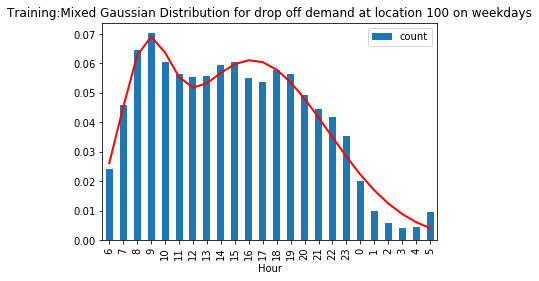

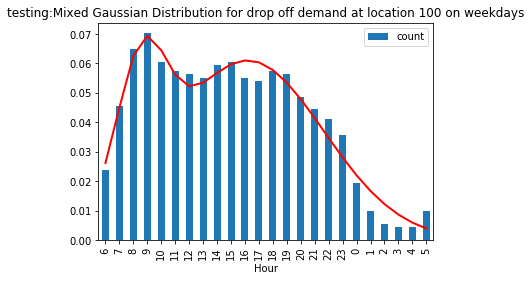

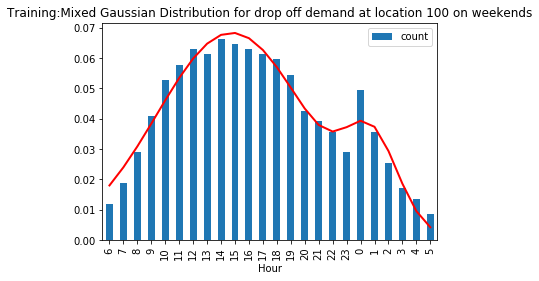

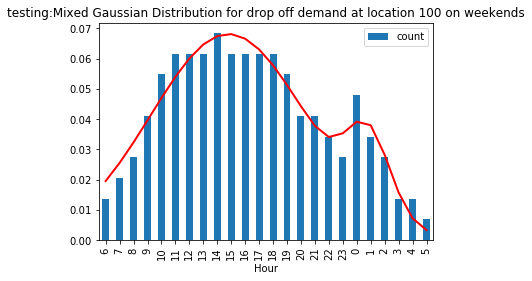

In [15]:

#weekday train
train = train_100_weekday['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_100_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_100_weekday, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 100 on weekdays')
plt.xlabel('Hour')

#weekday test

test = test_100_weekday['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_100_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_100_weekday, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 100 on weekdays')
plt.xlabel('Hour')



#weekend train
train = train_100_weekend['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_100_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_100_weekend, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 100 on weekends')
plt.xlabel('Hour')

#weekend test
test = test_100_weekend['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_100_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_100_weekend, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 100 on weekends')
plt.xlabel('Hour')



KL divergence for location 100:

KL divergence =  2.599477293836012e-05
KL divergence =  0.0010193855997544282


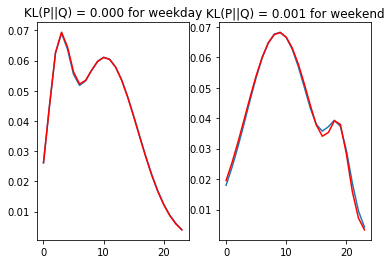

In [16]:
import matplotlib.pyplot as plt
KL=np.sum(train_pdf_100_weekday*np.log(train_pdf_100_weekday/test_pdf_100_weekday))
print('KL divergence = ', KL)
plt.subplot(1, 2, 1, autoscale_on=1)
plt.title('KL(P||Q) = %1.3f for weekday' % KL)
plt.plot(x_plot, train_pdf_100_weekday)
plt.plot(x_plot, test_pdf_100_weekday, c='red')

KL=np.sum(train_pdf_100_weekend*np.log(train_pdf_100_weekend/test_pdf_100_weekend))
print('KL divergence = ', KL)
plt.subplot(1, 2, 2, aspect='auto')
plt.title('KL(P||Q) = %1.3f for weekend' % KL)
plt.plot(x_plot, train_pdf_100_weekend)
plt.plot(x_plot, test_pdf_100_weekend, c='red')

We also fit location 143 demands to its own PDF model:

Text(0.5, 0, 'Hour')

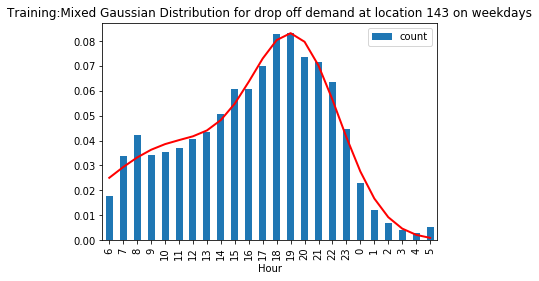

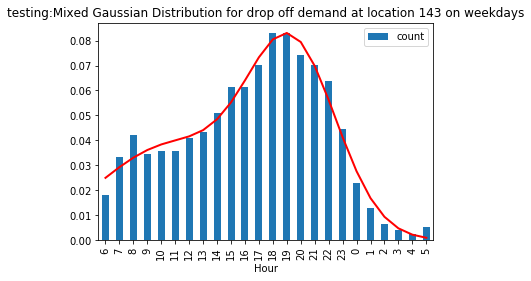

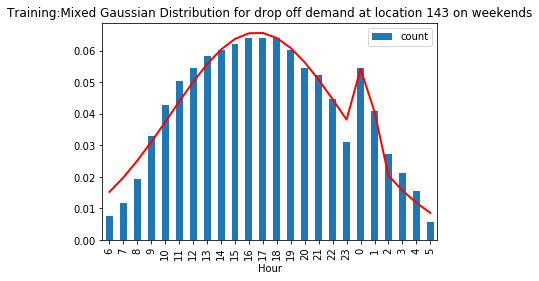

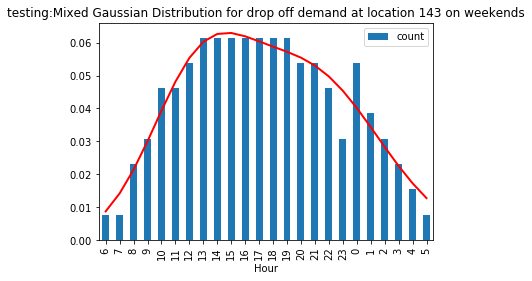

In [17]:

#weekday train
train = train_143_weekday['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
a=np.arange(start=6, stop=24, step=1)
b=np.arange(start=0, stop=6, step=1)
c=np.concatenate((a, b))
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_143_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_143_weekday, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 143 on weekdays')
plt.xlabel('Hour')

#weekday test

test = test_143_weekday['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_143_weekday=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_143_weekday, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 143 on weekdays')
plt.xlabel('Hour')



#weekend train
train = train_143_weekend['DropOff_datetime'].dt.hour.value_counts()
train=np.round(train/(365*3))
df2=pd.DataFrame()
df2['count']= train
df2=df2.sort_index()
df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

train_pdf_143_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, train_pdf_143_weekend, 'r', lw = 2)
plt.title('Training:Mixed Gaussian Distribution for drop off demand at location 143 on weekends')
plt.xlabel('Hour')

#weekend test
test = test_143_weekend['DropOff_datetime'].dt.hour.value_counts()
test=np.round(test/(365*3))
df2=pd.DataFrame()
df2['count']= test
df2=df2.sort_index()

df2=df2.reindex(c.tolist())
df2_n=df2/np.sum(df2)
data=df2.values
x_plot = np.arange(24)


expected=(5,.6,300,18,.4,800)
params, cov =  curve_fit(bimodal, x_plot, data.flatten(), expected)
ax = df2_n.plot.bar()

test_pdf_143_weekend=bimodal(x_plot, *params)/np.sum(bimodal(x_plot, *params))
plt.plot(x_plot, test_pdf_143_weekend, 'r', lw = 2)
plt.title('testing:Mixed Gaussian Distribution for drop off demand at location 143 on weekends')
plt.xlabel('Hour')



KL divergence for location 143:

KL divergence =  1.1337093191478667e-05
KL divergence =  0.012548198465998209


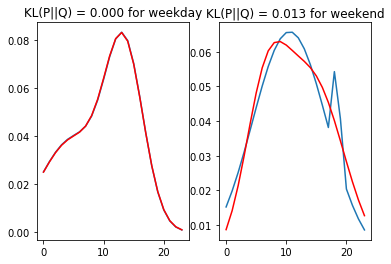

In [18]:
import matplotlib.pyplot as plt
KL=np.sum(train_pdf_143_weekday*np.log(train_pdf_143_weekday/test_pdf_143_weekday))
print('KL divergence = ', KL)
plt.subplot(1, 2, 1, autoscale_on=1)
plt.title('KL(P||Q) = %1.3f for weekday' % KL)
plt.plot(x_plot, train_pdf_143_weekday)
plt.plot(x_plot, test_pdf_143_weekday, c='red')

KL=np.sum(train_pdf_143_weekend*np.log(train_pdf_143_weekend/test_pdf_143_weekend))
print('KL divergence = ', KL)
plt.subplot(1, 2, 2, aspect='auto')
plt.title('KL(P||Q) = %1.3f for weekend' % KL)
plt.plot(x_plot, train_pdf_143_weekend)
plt.plot(x_plot, test_pdf_143_weekend, c='red')

Low KL divergence values for each location suggests that our model has captured the underlying Probability Distribution hypothesis. 

# 5) Implementation of schedualing algorithm:


We need to simulate a system where people are dynamically making slot requests to our system and in turn receive an approval or reject.
A few things to consider:
* We are given the IDs of each location. 
* To curb the effects of the pandemic, we try to minimize the number of occupants in the building during a day by setting a threshold for the number of occupants occupying the location at any given point of time
* We have set the threshold h, to be half of the number of occupants at the peak hour of the day.
* People who wish to go to the location must book a time slot by making a request to our system. A request for any location is roughly in the form of: <arrival time: t_a, time slot: b hours>
* We need to simulate a system where people are dynamically making slot requests to our system and in turn receive an approval or reject.
* A request is approved if it is valid. A request is considered valid if, when approved, the number of occupants at the requested location do not exceed the threshold value at any point of time during the requested slot.
* People can book slots from 6 AM till 5 AM of the next day
* The minimum number of hours and the maximum number of hours for which a person can book a slot is 1 and 6 respectively
* Bookings start at 6 AM. The last hour to book a slot is 5 AM.


**THE ALGORITHM:**

We need to demonstrate the traffic handling for one day. That is we demonstrate how requests are made and handled throughout a given day. For this we use our model to predict the number of requests (y) made at a given time t of the day. The flow of the algorithm is as follows:
* A person makes a request <arrival time: t_a, time slot: b hours> at time T. Time t_a can be T or any time in the future. 
* The algorithm checks if the request is valid. That is, ∀ t ∈[t_a, t_a + b -1], if num[t] + 1(for the new occupant) ≤ h (threshold), then the request is approved and rejected otherwise.


**THE SIMULATION**

The simulation of the real life scenario of the behaviour of the algorithm is shown as follows:

*Simulation of the number of requests at every hour:*
* We use our model to predict the number of requests at any given hour of the day. We say that the number of drop offs at a location at a time t in essence is equal to the number of requests that our system would get for a slot (for 1 - 6 hours) starting at time t.

*Simulation of requesting a slot:*                                                                 
A person may try to book a slot in advance starting from 6 AM or may book at the same time as arrival_time. A slot at 10 AM can be booked at any time between 6 AM - 10 AM (both included).
To simulate the same:
* Let’s say the predicted number of requests at time T is num_requests
* We try to randomly distribute num_requests between hours [6, T]. This essentially depicts that a request for time T can be made from 6 AM to T.
* The sum of the number of requests placed from 6 AM to time T for a slot at time T must be equal to the predicted number of slot requests at time T 
* For each request, the time slot for which the request is made is allocated randomly between 1-6 hours.

*Simulation of approval and denial of requests:*                                                   
At every hour in the day, certain number of requests are made for slots in the future hours. When a request is made, the algorithm checks if by approving this request, the number of occupants cross the threshold. In case it exceeds, the request is denied. If the request is approved, then the number of occupants during the requested time slot increases by 1.


For the sake of simplicity:
* We require that the values arrival_time and time slot be of type integers
* We require that the day starts at 6 AM. In essence, the bookings start at 6 AM

Additional features:
* When a request is denied, the system can cut short the time_slot requested and return a shorter time_slot for which the request remains valid. The use needs to approve or decline the new slot.


**Proof Of Correctness:**

This scheduling algorithm runs on a first book first serve policy. So, we have to prove that if a request is rejected between hours a and b, there can be no other accepted requests which come later and whose duration overlaps with the duration a to b.


According to the algorithm, the only reason Request 1 could be rejected is because at some point of time between [a, b] threshold will break if this request will be accommodated. Therefore, max people in the location between [a, b] is already h at time t. If request 2 which was made at a later time t2 for the same slot is accepted, then the number of people in the location between [a, b] will be h + 1 which cannot happen or if it can happen then Request 1 would have been accepted by the algorithm in the first place. (According to the project guidelines, once a request is made the departure time can neither increase nor decrease so there is no way max people between [a, b] has decreased between t and t2 to allocate request 2) 

**Analysis of Algorithm**

Both Time and Space complexities are linear in number of requests. Hence this can be said as an efficient algorithm. 

We use the PDFs obtained in the previous step

In [19]:
train_pdf_79_weekday
train_pdf_100_weekday
train_pdf_143_weekday


train_pdf_79_weekend
train_pdf_100_weekend
train_pdf_143_weekend

array([0.01524891, 0.01985318, 0.02517829, 0.03110481, 0.03743123,
       0.04387789, 0.05010286, 0.05572941, 0.06038255, 0.06372996,
       0.06552107, 0.06561806, 0.06401342, 0.06083083, 0.05630949,
       0.05077437, 0.04459772, 0.03815804, 0.05426065, 0.04069561,
       0.0204191 , 0.01573006, 0.011804  , 0.00862846])

In [20]:
n_req=10000 #example on number of request

In [21]:
#converts indices into hour of the day
def convert_time(hour):
    if hour+6 > 23:
        return hour+6 - 24
    return hour+6

In [22]:
#converts back hour into indices
def reconvert_time(hour):
    if hour < 6:
        return 18+hour
    return hour-6

In [23]:
#returns distribution of requests for hour x from 6 AM to x
def get_distribution(interval, requests):
    totals = list()
    count = 0
    for x in range (interval):
        totals.append(np.random.randint(0, requests-count))#, size=(24,))
        count += totals[x]

    if count != requests:
        totals.append(requests-count)
        
    for i in range(23-interval):
        totals.append(0)

    return totals



In [24]:
#returns distribution of requests across the hours of the day
def request_distribution(distribution, loc):             
    for x in range (24):
        totals = get_distribution(x, int(loc[x]))                    #returns distribution of requests for hour x from 6 AM to x 
        for y in range (24):                                         #loc[x] contains total number of requests for hour x
            distribution[y].append(totals[y])
    return distribution

In [25]:
import random
#processes requests placed at curr_hour and allocates slots
def place_requests(curr_hour, id, occupants, arrivals, departures, info, distribution, threshold, request_denied):

    for j in range (24):
        num_requests = distribution[curr_hour][j]                   #processing incoming requests for jth hour 
        
        if num_requests == 0:
            continue
        
        num_occupants = len(occupants[j])
        num_processed_requests = min(num_requests, threshold - num_occupants)
        
        for r in range(num_processed_requests):
            flag = True
            random_slot_b = random.randint(1, 6)          #any period of time between [1, 6] hrs
            random_slot_b_min = random_slot_b
            if j+random_slot_b > 23:                      #if out of bounds
                random_slot_b_min = 23 - j + 1
            
            for b in range (random_slot_b_min):           #not letting the # of occupants exceed threshold
                if len(occupants[j+b])+1 > threshold:
                    flag = False
                    break;
            id += 1     
            if flag:                                     #if threshold is not exceeded at any point of time during the requested slot
#                 id += 1
                occupant = (id, convert_time(j), convert_time(j+random_slot_b_min))
                for b in range(random_slot_b_min):
                    occupants[j+b].append(occupant)
                arrivals[j].append(id)
                departures[j+random_slot_b_min].append(id)
                info.append(occupant)
            else:
                state = list()
                for n in range(random_slot_b_min):
                    request_denied[curr_hour].append((id, convert_time(j+n), len(occupants[j+n])))
#                 request_denied[curr_hour].append(state)
#                 print(state)
                    
    return id, occupants, arrivals, departures, info, request_denied

**Generation of test data for scheduling algorithm**

We define an attribute id which is a unique ID that each user will be assigned when using this project. Currently we are assigning integers for this attribute, when this project goes to deployment, a User Interface can be created and we use that user ID in our newly defined attribute. In case this app is used with Apple Business chat, the ID can be users’ Apple ID. 

In [26]:
def compare_distribution(distribution, loc):        #the sum of the # of requests for time T placed between time 6 AM and T should be equal to the predicted # of requests for time T 
    for i in range(24):
        count = 0
        for j in range (24):
            count += distribution[j][i]
        if count != int(loc[i]):
            return false

    return True

In [27]:
#calculates the threshold by halving the predicted number of people at the peak hour during the day
def getThreshold(loc):
    return int(max(loc)/2)

**ALGORITHM**

In [28]:
#approves and denies the incoming requests for slots according to the number of occupants at the requested time
def schedulingAlgorithm(loc):
    threshold = getThreshold(loc)
    print('The maximum number of occupants allowed at any point of time in the building (threshold):',threshold)
    occupants = list()                                         #stores the data of occupants <id, arrival_time, departure_time> by every hour
    arrivals = list()                                         #stores the IDs of people supposed to arrive at every hour
    departures = list()                                       #stores the IDs of people supposed to depart at every hour
    distribution = list()                                     #distribution[i][j] = # of requests placed at hour i for hour j
    info = list()                                             #information<ID, arrival_time, departure_time>  of every person who's request got approved
    request_denied = list()
    id = 0
    for x in range(24):
        occupants.append(list())
        arrivals.append(list())
        departures.append(list())
        distribution.append(list())
        request_denied.append(list())

    departures.append(list())                     #last hour for departures

    distribution = request_distribution(distribution, loc)      

    print(compare_distribution(distribution, loc))                      #to check if requests are correctly distributed

    #start processing requests placed every hour
    for i in range(24):
        id, occupants, arrivals, departures, info, request_denied = place_requests(i, id, occupants, arrivals, departures, info, distribution, threshold, request_denied)

    for x in range(24):
        print('Number of occupants in the building at', convert_time(x),'is', len(occupants[x]))
        
    return arrivals, departures, info, request_denied, threshold

In [29]:
#prints the arrivals and departures of people per hour of the day 
def print_schedule(arrivals, departures, output_file):
    for i in range(24):
        print('--------------Arrivals at', convert_time(i), '-----------------', file = output_file)
        for x in range (len(arrivals[i])):
            print("ID: ",arrivals[i][x], file = output_file)
        print('--------------Departues', convert_time(i), '---------------', file = output_file)
        for x in range (len(departures[i])):
            print("ID: ",departures[i][x],file = output_file)
        print('=================================================================',file = output_file)

    print('--------------Departues', convert_time(i), '---------------', file = output_file)
    for x in range (len(departures[i])):
            print("ID: ",departures[i][x],file = output_file)

In [30]:
#prints an example of an approved request
def print_demo(loc, arrivals, departures, info):
    #Example 1:
    x = np.random.randint(0, len(info))
    print('Person with ID:', x,'requested a time slot for location:',loc,'at', info[x-1][1], 'until', info[x-1][2])
    print('So the person must enter the building at',info[x-1][1], 'and leave at', info[x-1][2])
    print('ID',x,'present in arrival list at time',info[x-1][1],':', x in arrivals[reconvert_time(info[x-1][1])])
    print('ID',x,'present in departure list at time',info[x-1][2],':', x in departures[reconvert_time(info[x-1][2])])

In [31]:
def print_request_denied(loc, day, request_denied, threshold): #prints examples of requests denied and the entire list of rejected requests in an output file
    filename = 'requests_denied_for_'+ str(loc) +'_'+ str(day)
    out_file = open(filename, 'w')
    
    for x in range(24):
        l = list()
        i = 0
#         print(x)
        if len(request_denied[x])==0:
            continue
#         print(request_denied[x])
        index = request_denied[x][0][0]
        start_time = request_denied[x][0][1]
        while i < len(request_denied[x]) and request_denied[x][i][0] == index:
            end_time = request_denied[x][i][1]
            i += 1
            
        print('Request placed by person with ID:', index, 'for loc',loc,'denied for a slot from time', start_time, 'to ', end_time,'due to occupany as follows:')
        print('Time', '# of occupants')
        for y in range(i):
            print(request_denied[x][y][1],'      ', request_denied[x][y][2])
        for y in range(i):
            if request_denied[x][y][2] == threshold:
                print('Threshold exceeded at time:', request_denied[x][y][1])
                break
        print('Requests denied at time', convert_time(x), ':', file = out_file)
        print('ID   ', 'Start_Time', 'End_Time', file = out_file)
        y = 0
        while y < (len(request_denied[x])):
            ind = request_denied[x][y][0]
            start = request_denied[x][y][1]
            while y < (len(request_denied[x])) and ind == request_denied[x][y][0]:
                y += 1
            end = request_denied[x][y-1][1]
            print(ind, '     ',start, '     ',end, file = out_file)
            
#         for y in range (len(request_denied[x])):
#             print(request_denied[x][y], file = out_file)
                
    out_file.close()

We store all the log data for accepted requests, rejected requests and an Administrator who will be using this app can retrieve the history of each user by a single click. (We will export the data to a Database). We can add a feature where the Administrator will get an alert when a request expires and it is time for that user to leave. There is another solution to this, at the end of each clock hour, the system will pause work for every user and they will be required to log in to the system. Only the users whose requests’ are valid will be allowed to log in and thus others have to leave. 

**LOCATION 79**

Weekday

In [32]:
loc79_weekday=n_req*train_pdf_79_weekday #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc79_weekday)
print(hours)
print('Number of requests at 6 AM: ',loc79_weekday[0] )

[ 117.48716041  142.24755492  168.18226325  194.20341444  219.13556172
  242.08184828  263.26064152  285.60688268  316.97170652  371.32398472
  465.53962091  608.87587916  788.07269414  959.73079347 1062.835963
 1050.18551781  917.7525529   708.00672035  484.26269284  297.28445407
  167.82486213   90.7568538    49.63472616   28.73565079]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  117.48716041235367


In [33]:
#schedule the incoming requests 
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc79_weekday)

The maximum number of occupants allowed at any point of time in the building (threshold): 531
True
Number of occupants in the building at 6 is 117
Number of occupants in the building at 7 is 231
Number of occupants in the building at 8 is 343
Number of occupants in the building at 9 is 434
Number of occupants in the building at 10 is 439
Number of occupants in the building at 11 is 531
Number of occupants in the building at 12 is 531
Number of occupants in the building at 13 is 531
Number of occupants in the building at 14 is 443
Number of occupants in the building at 15 is 531
Number of occupants in the building at 16 is 531
Number of occupants in the building at 17 is 531
Number of occupants in the building at 18 is 531
Number of occupants in the building at 19 is 531
Number of occupants in the building at 20 is 531
Number of occupants in the building at 21 is 531
Number of occupants in the building at 22 is 531
Number of occupants in the building at 23 is 531
Number of occupants in 

In [34]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc79_weekday', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [35]:
print_demo(79, arrivals, departures, info)

Person with ID: 2835 requested a time slot for location: 79 at 2 until 6
So the person must enter the building at 2 and leave at 6
ID 2835 present in arrival list at time 2 : True
ID 2835 present in departure list at time 6 : False


In [36]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(79, 'weekday', request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2992 for loc 79 denied for a slot from time 7 to  12 due to occupany as follows:
Time # of occupants
7        220
8        332
9        389
10        363
11        487
12        531
Threshold exceeded at time: 12
Request placed by person with ID: 3424 for loc 79 denied for a slot from time 9 to  13 due to occupany as follows:
Time # of occupants
9        417
10        402
11        514
12        531
13        531
Threshold exceeded at time: 12
Request placed by person with ID: 3635 for loc 79 denied for a slot from time 9 to  12 due to occupany as follows:
Time # of occupants
9        431
10        429
11        529
12        531
Threshold exceeded at time: 12
Request placed by person with ID: 3677 for loc 79 denied for a slot from time 10 to  11 due to occupany as follows:
Time # of occupants
10        438
11        531
Threshold exceeded at time: 11
Request placed by person with ID:

Weekend

In [37]:
loc79_weekend=n_req*train_pdf_79_weekend #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc79_weekend)
print(hours)
print('Number of requests at 6 AM: ',loc79_weekend[0] )

[ 79.7315908  108.61721612 144.0070714  185.81718732 233.34841644
 285.19423784 339.2294497  392.70213429 442.43542001 485.12474434
 517.69489017 537.66435198 543.45750282 534.61519856 512.02283394
 480.42888152 466.45347143 555.33521797 798.21549281 949.45193755
 737.04226076 383.96131907 180.39988463 107.04928851]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  79.73159079745648


In [38]:
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc79_weekend)

The maximum number of occupants allowed at any point of time in the building (threshold): 474
True
Number of occupants in the building at 6 is 79
Number of occupants in the building at 7 is 164
Number of occupants in the building at 8 is 266
Number of occupants in the building at 9 is 351
Number of occupants in the building at 10 is 393
Number of occupants in the building at 11 is 332
Number of occupants in the building at 12 is 474
Number of occupants in the building at 13 is 474
Number of occupants in the building at 14 is 474
Number of occupants in the building at 15 is 462
Number of occupants in the building at 16 is 422
Number of occupants in the building at 17 is 474
Number of occupants in the building at 18 is 474
Number of occupants in the building at 19 is 474
Number of occupants in the building at 20 is 474
Number of occupants in the building at 21 is 429
Number of occupants in the building at 22 is 474
Number of occupants in the building at 23 is 474
Number of occupants in t

In [39]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc79_weekend', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [40]:
print_demo(79, arrivals, departures, info)

Person with ID: 706 requested a time slot for location: 79 at 13 until 14
So the person must enter the building at 13 and leave at 14
ID 706 present in arrival list at time 13 : True
ID 706 present in departure list at time 14 : True


In [41]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(79, 'weekend', request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2598 for loc 79 denied for a slot from time 8 to  13 due to occupany as follows:
Time # of occupants
8        175
9        216
10        195
11        146
12        423
13        474
Threshold exceeded at time: 13
Request placed by person with ID: 3453 for loc 79 denied for a slot from time 8 to  12 due to occupany as follows:
Time # of occupants
8        258
9        330
10        377
11        292
12        474
Threshold exceeded at time: 12
Request placed by person with ID: 3782 for loc 79 denied for a slot from time 9 to  13 due to occupany as follows:
Time # of occupants
9        340
10        385
11        315
12        474
13        474
Threshold exceeded at time: 12
Request placed by person with ID: 3985 for loc 79 denied for a slot from time 10 to  15 due to occupany as follows:
Time # of occupants
10        393
11        321
12        474
13        474
14        474
15      

**LOCATION 100**

Weekday

In [42]:
loc100_weekday=n_req*train_pdf_100_weekday #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc100_weekday)
print(hours)
print('Number of requests at 6 AM: ',loc100_weekday[0] )

[261.25157687 451.22465486 626.72739873 691.02031158 637.05355214
 553.89639386 517.66825511 532.78571514 567.8012857  597.48478491
 610.72715875 604.29782739 578.52088738 535.83194845 480.15120809
 416.26243143 349.13723888 283.31195105 222.41976744 168.93577762
 124.13940334  88.25461763  60.70227769  40.39357597]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  261.2515768728044


In [43]:
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc100_weekday)

The maximum number of occupants allowed at any point of time in the building (threshold): 345
True
Number of occupants in the building at 6 is 261
Number of occupants in the building at 7 is 345
Number of occupants in the building at 8 is 345
Number of occupants in the building at 9 is 336
Number of occupants in the building at 10 is 345
Number of occupants in the building at 11 is 345
Number of occupants in the building at 12 is 345
Number of occupants in the building at 13 is 345
Number of occupants in the building at 14 is 345
Number of occupants in the building at 15 is 345
Number of occupants in the building at 16 is 345
Number of occupants in the building at 17 is 333
Number of occupants in the building at 18 is 345
Number of occupants in the building at 19 is 337
Number of occupants in the building at 20 is 345
Number of occupants in the building at 21 is 345
Number of occupants in the building at 22 is 345
Number of occupants in the building at 23 is 319
Number of occupants in 

In [44]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc100_weekday', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [45]:
print_demo(100, arrivals, departures, info)

Person with ID: 1043 requested a time slot for location: 100 at 15 until 17
So the person must enter the building at 15 and leave at 17
ID 1043 present in arrival list at time 15 : True
ID 1043 present in departure list at time 17 : True


In [46]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(100, 'weekday',request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2224 for loc 100 denied for a slot from time 9 to  13 due to occupany as follows:
Time # of occupants
9        329
10        345
11        345
12        345
13        345
Threshold exceeded at time: 10
Request placed by person with ID: 2376 for loc 100 denied for a slot from time 9 to  14 due to occupany as follows:
Time # of occupants
9        334
10        345
11        345
12        345
13        345
14        345
Threshold exceeded at time: 10
Request placed by person with ID: 2481 for loc 100 denied for a slot from time 9 to  14 due to occupany as follows:
Time # of occupants
9        336
10        345
11        345
12        345
13        345
14        345
Threshold exceeded at time: 10
Request placed by person with ID: 2599 for loc 100 denied for a slot from time 17 to  18 due to occupany as follows:
Time # of occupants
17        328
18        345
Threshold exceeded at time: 18

Weekend

In [47]:
loc100_weekend=n_req*train_pdf_100_weekend #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc100_weekend)
print(hours)
print('Number of requests at 6 AM: ',loc100_weekend[0] )

[179.9432092  239.78238612 308.61064662 383.63333946 460.61024239
 534.14928392 598.278672   647.22636876 676.27090345 682.49134422
 665.25381034 626.34187696 569.8185316  502.12138944 433.33557919
 379.16972438 357.57073475 372.0219998  393.19498297 373.28613853
 293.60100247 185.67563758  95.43819479  42.17400105]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  179.94320920231976


In [48]:
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc100_weekend)

The maximum number of occupants allowed at any point of time in the building (threshold): 341
True
Number of occupants in the building at 6 is 179
Number of occupants in the building at 7 is 219
Number of occupants in the building at 8 is 325
Number of occupants in the building at 9 is 341
Number of occupants in the building at 10 is 341
Number of occupants in the building at 11 is 313
Number of occupants in the building at 12 is 341
Number of occupants in the building at 13 is 341
Number of occupants in the building at 14 is 341
Number of occupants in the building at 15 is 341
Number of occupants in the building at 16 is 341
Number of occupants in the building at 17 is 341
Number of occupants in the building at 18 is 341
Number of occupants in the building at 19 is 341
Number of occupants in the building at 20 is 341
Number of occupants in the building at 21 is 311
Number of occupants in the building at 22 is 341
Number of occupants in the building at 23 is 276
Number of occupants in 

In [49]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc100_weekend', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [50]:
print_demo(100, arrivals, departures, info)

Person with ID: 2337 requested a time slot for location: 100 at 4 until 6
So the person must enter the building at 4 and leave at 6
ID 2337 present in arrival list at time 4 : False
ID 2337 present in departure list at time 6 : False


In [51]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(100, 'weekend', request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2154 for loc 100 denied for a slot from time 7 to  12 due to occupany as follows:
Time # of occupants
7        161
8        281
9        341
10        341
11        300
12        341
Threshold exceeded at time: 9
Request placed by person with ID: 2658 for loc 100 denied for a slot from time 8 to  11 due to occupany as follows:
Time # of occupants
8        323
9        341
10        341
11        305
Threshold exceeded at time: 9
Request placed by person with ID: 2803 for loc 100 denied for a slot from time 11 to  14 due to occupany as follows:
Time # of occupants
11        310
12        341
13        341
14        341
Threshold exceeded at time: 12
Request placed by person with ID: 2896 for loc 100 denied for a slot from time 11 to  16 due to occupany as follows:
Time # of occupants
11        313
12        341
13        341
14        341
15        341
16        341
Threshold exceeded 

**LOCATION 143**

Weekday

In [52]:
loc143_weekday=n_req*train_pdf_143_weekday #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc143_weekday)
print(hours)
print('Number of requests at 6 AM: ',loc143_weekday[0] )

[250.1615579  293.37285722 331.86833365 362.9266966  385.54965142
 401.66777133 416.9678909  440.51795574 482.30744026 548.54064659
 636.144076   729.63900034 803.62290414 831.49419315 796.8411843
 701.26314763 563.927224   413.19959616 275.42931279 166.89669615
  91.91944004  46.03265657  20.98426203   8.72550511]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  250.1615579025561


In [53]:
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc143_weekday)

The maximum number of occupants allowed at any point of time in the building (threshold): 415
True
Number of occupants in the building at 6 is 250
Number of occupants in the building at 7 is 385
Number of occupants in the building at 8 is 413
Number of occupants in the building at 9 is 415
Number of occupants in the building at 10 is 415
Number of occupants in the building at 11 is 415
Number of occupants in the building at 12 is 404
Number of occupants in the building at 13 is 391
Number of occupants in the building at 14 is 415
Number of occupants in the building at 15 is 379
Number of occupants in the building at 16 is 415
Number of occupants in the building at 17 is 410
Number of occupants in the building at 18 is 376
Number of occupants in the building at 19 is 415
Number of occupants in the building at 20 is 415
Number of occupants in the building at 21 is 388
Number of occupants in the building at 22 is 415
Number of occupants in the building at 23 is 415
Number of occupants in 

In [54]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc143_weekday', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [55]:
print_demo(143, arrivals, departures, info)

Person with ID: 508 requested a time slot for location: 143 at 8 until 14
So the person must enter the building at 8 and leave at 14
ID 508 present in arrival list at time 8 : True
ID 508 present in departure list at time 14 : True


In [56]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(143, 'weekday', request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2234 for loc 143 denied for a slot from time 7 to  11 due to occupany as follows:
Time # of occupants
7        378
8        409
9        415
10        415
11        415
Threshold exceeded at time: 9
Request placed by person with ID: 2895 for loc 143 denied for a slot from time 8 to  11 due to occupany as follows:
Time # of occupants
8        413
9        415
10        415
11        415
Threshold exceeded at time: 9
Request placed by person with ID: 3342 for loc 143 denied for a slot from time 12 to  17 due to occupany as follows:
Time # of occupants
12        379
13        359
14        406
15        372
16        415
17        367
Threshold exceeded at time: 16
Request placed by person with ID: 3539 for loc 143 denied for a slot from time 12 to  17 due to occupany as follows:
Time # of occupants
12        398
13        378
14        415
15        379
16        415
17        379
Thres

Weekend

In [57]:
loc143_weekend=n_req*train_pdf_143_weekend #draw our samples out of the pdf for location 79 ordered with respect to "hours"
hours=c #hours of the day
print(loc143_weekend)
print(hours)
print('Number of requests at 6 AM: ',loc143_weekend[0] )

[152.48914781 198.53177686 251.78291512 311.04814892 374.31231914
 438.77892093 501.02861094 557.29408476 603.82553639 637.29961191
 655.21068015 656.18064734 640.1341595  608.30827491 563.09488354
 507.74373561 445.97724705 381.58041088 542.60654471 406.95607099
 204.19101622 157.3006006  118.04003342  86.28462232]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Number of requests at 6 AM:  152.48914780683458


In [58]:
arrivals, departures, info, request_denied, threshold = schedulingAlgorithm(loc143_weekend)

The maximum number of occupants allowed at any point of time in the building (threshold): 328
True
Number of occupants in the building at 6 is 152
Number of occupants in the building at 7 is 197
Number of occupants in the building at 8 is 328
Number of occupants in the building at 9 is 328
Number of occupants in the building at 10 is 297
Number of occupants in the building at 11 is 328
Number of occupants in the building at 12 is 328
Number of occupants in the building at 13 is 328
Number of occupants in the building at 14 is 328
Number of occupants in the building at 15 is 328
Number of occupants in the building at 16 is 328
Number of occupants in the building at 17 is 328
Number of occupants in the building at 18 is 328
Number of occupants in the building at 19 is 328
Number of occupants in the building at 20 is 328
Number of occupants in the building at 21 is 328
Number of occupants in the building at 22 is 328
Number of occupants in the building at 23 is 324
Number of occupants in 

In [59]:
###Check output directory for arrivals and departures 
output_file = open('arrs_depts_loc143_weekend', 'w')
print_schedule(arrivals, departures, output_file)
output_file.close()

In [60]:
print_demo(143, arrivals, departures, info)

Person with ID: 2105 requested a time slot for location: 143 at 4 until 6
So the person must enter the building at 4 and leave at 6
ID 2105 present in arrival list at time 4 : True
ID 2105 present in departure list at time 6 : False


In [61]:
###Check output directory for whole list of requests denied
print('A few examples of requests denied and the occupancy of the location:')
print_request_denied(143, 'weekend', request_denied, threshold)

A few examples of requests denied and the occupancy of the location:
Request placed by person with ID: 2218 for loc 143 denied for a slot from time 7 to  11 due to occupany as follows:
Time # of occupants
7        148
8        304
9        328
10        279
11        328
Threshold exceeded at time: 9
Request placed by person with ID: 2488 for loc 143 denied for a slot from time 10 to  12 due to occupany as follows:
Time # of occupants
10        287
11        328
12        328
Threshold exceeded at time: 11
Request placed by person with ID: 2544 for loc 143 denied for a slot from time 10 to  11 due to occupany as follows:
Time # of occupants
10        292
11        328
Threshold exceeded at time: 11
Request placed by person with ID: 2577 for loc 143 denied for a slot from time 10 to  15 due to occupany as follows:
Time # of occupants
10        294
11        328
12        328
13        328
14        328
15        328
Threshold exceeded at time: 11
Request placed by person with ID: 2606 f

**Our Estimation:**

As mentioned in the problem statement, departure times cannot change dynamically. So, people in the beginning if they try to request slots according to their preference as it was before COVID19 will slowly change their schedule as most of them would get rejected and they will observe that during low hours, the number of people is far less than threshold.

People will realize that requesting to go to the location in a time of the day when pre COVID19 demand was less will be more fruitful as they will be allocated their respective requests more often. Hence after some reasonable time say 6 months, the plot will be close to horizontal line and social distancing will be a part of lifestyle. In this scenario of strategic agents (people) this would be the Nash Equilibrium. 


**Extensions:**

* The algorithm can be modified such that it gives recommendations on the time duration or the start and end times of his slot. Or if the Administrator allows, we can show each user a tab which consists of available slots such that user can make decision on when to come and how long he can stay.
* Currently we don’t allow dynamic slot duration for requests but to maximize the efficiency, we can try to develop an algorithm to accommodate dynamic duration.
* Instead of an outright reject, the requests which are not accepted immediately can be put in a waitlist so that if someone doesn’t show up, we can send people from this waitlisted Queue.